# Employee Churn Prediction Model Project

##### This ML and data analysis project seeks to best predict employee churn that can be used enhance employee retention and enhance operational efficiency. 

##### Data Source : https://www.kaggle.com/datasets/shubh0799/churn-modelling

## Table of contents:
1. Loading the required libraries.
2. Loading the dataset.
3. Data Wranging.
4. Exploratory Data Analysis
5. Building the model.
6. Conclusion.
7. Application.

### Loading the required libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the dataset

In [2]:
df = pd.read_csv("D:\others\Personal Projects 2\Practice Files July 2024\Employee Churn\Churn_Modelling.csv")

<>:1: SyntaxWarning: invalid escape sequence '\o'
<>:1: SyntaxWarning: invalid escape sequence '\o'
C:\Users\Alvin\AppData\Local\Temp\ipykernel_9004\2744965086.py:1: SyntaxWarning: invalid escape sequence '\o'
  df = pd.read_csv("D:\others\Personal Projects 2\Practice Files July 2024\Employee Churn\Churn_Modelling.csv")


In [3]:
## first 5 rows

pd.set_option("display.max_columns", None)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
## shape

df.shape

(10000, 14)

In [5]:
## datatypes 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### 3. Wrangling the data

In [6]:
## checking for duplicates

df.duplicated().sum()

0

In [7]:
## Renaming columns

df = df.rename(columns = {
    "CustomerId" : "Customer Id",
    "Surname" : "Customer Name",
    "CreditScore" : "Credit Score",
    "NumOfProducts" : "No of Products",
    "HasCrCard" : "Credit Card Owenrship Status",
    "IsActiveMember" : "Member Status", 
    "EstimatedSalary" : "Salary",
    "Geography" : "Country"
})

In [8]:
## removing unwanted columns

df = df.drop(columns = ["RowNumber"])

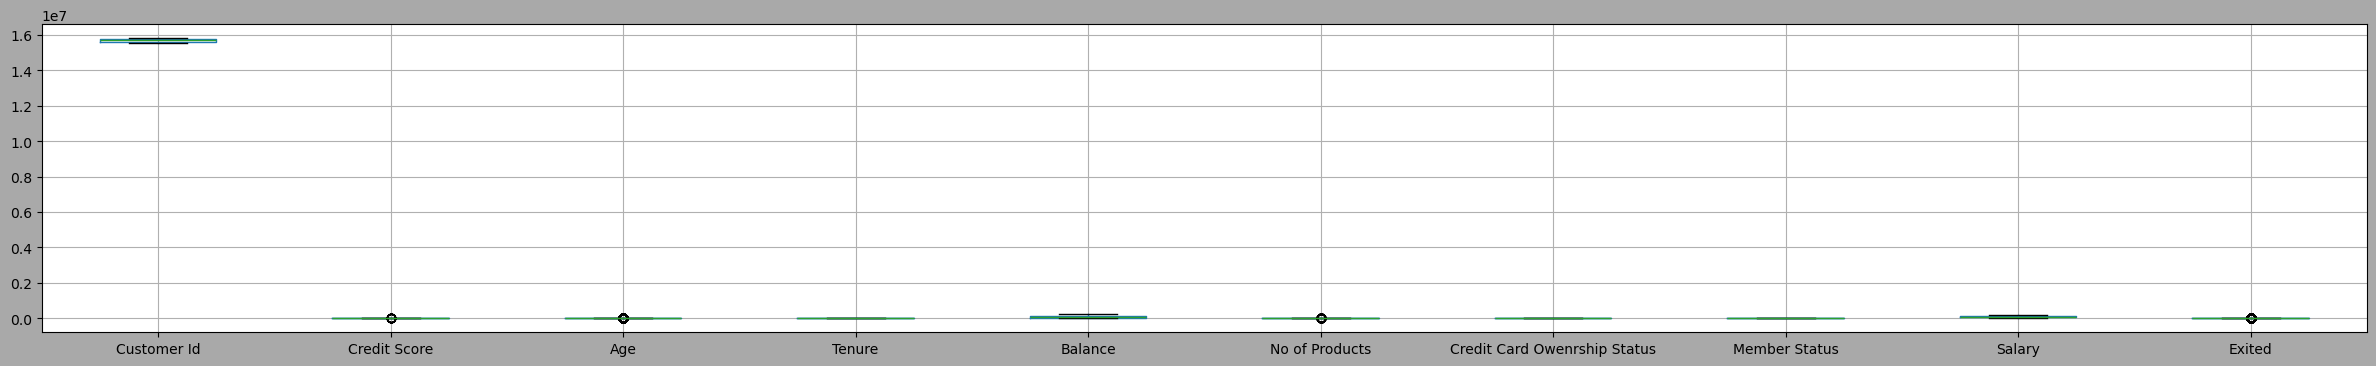

In [9]:
## detecting outliers

plt.figure(figsize = (30,4), facecolor = "darkgrey")
df.boxplot()
plt.grid(True)
plt.show()

In [10]:
df.head()

,Customer Id,Customer Name,Credit Score,Country,Gender,Age,Tenure,Balance,No of Products,Credit Card Owenrship Status,Member Status,Salary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Exploratory Data Analysis

In [11]:
## summary statistics

df.describe()

,Customer Id,Credit Score,Age,Tenure,Balance,No of Products,Credit Card Owenrship Status,Member Status,Salary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [13]:
## more descriptive statistics

from scipy.stats import describe

numeric_df = df.drop(columns = ["Customer Id", "Customer Name", "Country", "Gender"])

description = describe(numeric_df)

for key, value in description._asdict().items():
    print(f"{key} : {value}")

nobs : 10000
minmax : (array([350.  ,  18.  ,   0.  ,   0.  ,   1.  ,   0.  ,   0.  ,  11.58,
         0.  ]), array([8.5000000e+02, 9.2000000e+01, 1.0000000e+01, 2.5089809e+05,
       4.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.9999248e+05,
       1.0000000e+00]))
mean : [6.50528800e+02 3.89218000e+01 5.01280000e+00 7.64858893e+04
 1.53020000e+00 7.05500000e-01 5.15100000e-01 1.00090240e+05
 2.03700000e-01]
variance : [9.34186016e+03 1.09994084e+02 8.36467263e+00 3.89343618e+09
 3.38321792e-01 2.07790529e-01 2.49796970e-01 3.30745678e+09
 1.62222532e-01]
skewness : [-0.07159587  1.01116856  0.01098981 -0.14108754  0.74545605 -0.90167632
 -0.06042756  0.00208504  1.47138991]
kurtosis : [-0.42611279  1.39404955 -1.16524264 -1.48926711  0.58208937 -1.18697982
 -1.99634851 -1.18152771  0.16498828]


In [15]:
## total number of customers per country

table = pd.pivot_table(data = df, values = "Customer Id", index = "Country", aggfunc=np.count_nonzero)
table

,Customer Id
Country,
France,5014
Germany,2509
Spain,2477


### Building the Employee Churn Prediction Model

In [31]:
## dividing the data into i.v and d.v

X = numeric_df.drop(columns = ["Exited"])
y = numeric_df["Exited"]

In [17]:
## loading the regressor

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

In [20]:
## fitting the model 

log_reg.fit(X, y)

C:\Users\Alvin\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
## coefficients

log_reg.coef_

array([[-4.50772283e-03,  4.44614709e-02, -6.56187019e-02,
         3.62816111e-06, -2.05102182e-02, -8.74126073e-03,
        -4.49962322e-02, -1.24342499e-06]])

In [22]:
## intercept 

log_reg.intercept_

array([-0.01090011])

In [24]:
## predicting the model

pred = log_reg.predict(X)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [26]:
## confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y, pred)

array([[7791,  172],
       [1917,  120]], dtype=int64)

In [28]:
## calculating the accuracy

round((7791 + 120) / (7791 + 172 + 1917 + 120), 2)

0.79

### Conclusion 
The model has an accuracy of 79% making it a good precictor of employee churn. 

### Applications :
1. The model helps the HR Department to formulate effective employee retention strategies.
2. Finance and HR Departments benefit from improved planning and resource allocation, ensuring smoother operations and cost management.
3. HR and Operations Departemnts can use this model to enhance employee engagement, optimizing team structures. 